Notebook to get and clean the data of Il Sole 24 Ore about covid19 vaccination

In [1]:
from helpers import *

In [75]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [76]:
search_url='https://www.ilsole24ore.com/'

driver.get(search_url) 
time.sleep(1)
# Aceptar cookkies
driver.find_element_by_id('onetrust-accept-btn-handler').click()

In [77]:
# def login(): 
#     driver.find_element_by_xpath('//*[@id="l-header"]/div[1]/div[1]/nav/div/div[3]/ul/li[5]/a[1]').click()
#     time.sleep(1)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[1]/input').send_keys(email)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[2]/input').send_keys(password)
#     time.sleep(1)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[3]/input').click()

In [ ]:
'https://www.ricerca24.ilsole24ore.com/?cmd=static&chId=30&path=/search/search_engine.jsp&field=Titolo|Testo&orderBy=score+desc&chId=30&keyWords=vaccinazione&pageNumber=1&pageSize=&fromDate=&toDate=&filter=only_articles'

In [34]:
# There are 428pages of vacinnes, but just 41 are from Covid: 
list_search_url =[]
list_search_url.append('https://www.ricerca24.ilsole24ore.com/?cmd=static&chId=30&path=/search/search_engine.jsp&field=Titolo|Testo&orderBy=score+desc&chId=30&keyWords=vaccinazione&pageNumber=1&pageSize=&fromDate=&toDate=&filter=only_articles')
for i in range(2, 428):
    list_search_url.append(f'https://www.ricerca24.ilsole24ore.com/?cmd=static&chId=30&path=/search/search_engine.jsp&field=Titolo|Testo&orderBy=score+desc&chId=30&keyWords=vaccinazione&pageNumber={i}&pageSize=&fromDate=&toDate=&filter=only_articles')

In [41]:
list_links=[]
for i in list_search_url: 
    driver.get(i)
    time.sleep(5)
    links = driver.find_elements_by_xpath('//h3/a')
    for j in links: 
        list_links.append(j.get_attribute('href'))


In [48]:
# Store the list in a document
with open("list_links_sole.txt", 'r') as f:
    list_links_sole = [line.rstrip('\n') for line in f]
    list_links_sole= list(set(list_links))
len(list_links_sole)

4025

In [49]:
with open("list_links_sole.txt", 'r') as f:
    list_links_sole = [line.rstrip('\n') for line in f]
    

In [59]:
def get_html_sole(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/SOLE/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [79]:
# get_html_sole(list_links_sole)

In [80]:
# get_html_sole(list_links_sole[737:])

In [81]:
# get_html_sole(list_links_sole[1977:])

In [82]:
# get_html_sole(list_links_sole[3069:])

In [78]:
get_html_sole(list_links_sole[3134:])

In [3]:
import os
import re
list_articles_sole=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/SOLE/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/SOLE/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()

    except: 
        title="error"
        
    try:
        regex = re.compile('auth')
        author=soup.find("p",{"class" : regex}).text.strip()
    except: 
        try: 
            #sanitas
            author=soup.find("p",{"class" : "autore"}).text.strip()
        except: 
            author="error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        regex = re.compile('asummary')
        subheadline= soup.find("h2",{"class":regex}).text.strip()
    except: 
        subheadline="error"
            
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
#         tf=soup.find("span",class_="link-wrapper-hovercard").decompose()
        if soup.find_all("p",class_="atext"):
            tf=soup.find_all("p",class_="atext")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
        elif soup.find("div",class_="contenuto").find_all("p"):
            #sanitas
            tf=soup.find("div",class_="contenuto").find_all("p")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
        elif soup.find("div",class_="grid-8 top art11_body body"): 
            tf=soup.find("div",class_="grid-8 top art11_body body")
            for div in tf.find_all("div"): 
                div.decompose()
            tf=soup.find("div",class_="grid-8 top art11_body body").find_all("p")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
        elif soup.find("div",class_="entry relative"):
            tf=soup.find("div",class_="entry relative").find_all("p")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
            
    except: 
            text="error"

    list_articles_sole.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
articles_sole = pd.DataFrame.from_dict(list_articles_sole)


## CLEAN DATASET

In [5]:
articles_sole=articles_sole.drop(articles_sole[articles_sole['Link']=="error"].index,inplace=False)

In [6]:
#articles of sanita that you need a login. Thats the reson why they have error in the text. 
#We drop them because they are just 222, and its fine, we want the articles of il sole 24 ore and we have thousands
articles_sole=articles_sole.drop(articles_sole[(articles_sole.Link.str.contains("sanita24")) & (articles_sole['Text']=="error")].index,inplace=False)
#error general(just one case)
articles_sole=articles_sole.drop(articles_sole[articles_sole['Link']=='https://www.ilsole24ore.com/'].index, inplace=False)
articles_sole=articles_sole.drop(articles_sole[articles_sole['Text']=="error"].index, inplace=False)
#There are links of the radio24 and there are before 2020
articles_sole=articles_sole.drop(articles_sole[articles_sole['Date']=="error"].index, inplace=False)
articles_sole=articles_sole.drop(articles_sole[articles_sole['Date']<'2020-01-01'].index, inplace=False)

In [7]:
articles_sole=articles_sole[articles_sole.Text.str.contains("vacc|Vacc")|articles_sole.Subheadline.str.contains("vacc|Vacc")|articles_sole.Title.str.contains("vacc|Vacc")]

In [8]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
    text = re.sub('\ufeff', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
articles_sole['Text']=articles_sole['Text'].apply(preprocessor)
articles_sole['n_words'] = articles_sole.Text.apply(lambda x: len(str(x).split(' ')))
articles_sole['Newspaper']= 'Il Sole 24 Ore'
articles_sole['Country']= 'Italy'

In [11]:
articles_sole.sort_values('n_words')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
3697,Dl semplificazioni/Brevetti congelati su farma...,error,Il governo potrà obbligare temporaneamente i p...,di Dino Pesole,2021-07-29,https://www.ilsole24ore.com/art/dl-semplificaz...,29,Il Sole 24 Ore,Italy
1906,Quattrocento milioni per l'acquisto di vaccini...,error,Viene istituito un fondo al ministero della Sa...,di Dino Pesole,2020-11-16,https://www.ilsole24ore.com/art/quattrocento-m...,30,Il Sole 24 Ore,Italy
2916,"Speranza, da 3 giugno prenotazione vaccini per...",error,«Da domani tutti potranno prenotare il vaccino...,error,2021-06-02T12:51:10Z,http://www.sanita24.ilsole24ore.com/art/dal-go...,36,Il Sole 24 Ore,Italy
1451,"Decreto sostegni bis / Sanità militare, fondi ...",error,Per conseguire l’autonomia produttiva di antic...,di Dino Pesole,2021-05-04,https://www.ilsole24ore.com/art/decreto-sosteg...,38,Il Sole 24 Ore,Italy
1201,I volti della partita contro il Coronavirus / ...,error,Claudia Alivernini è l’infermiera 29enne roman...,di Dino Pesole,2020-12-28,https://www.ilsole24ore.com/art/i-volti-partit...,40,Il Sole 24 Ore,Italy
...,...,...,...,...,...,...,...,...,...
1050,"Tutte le incognite su tracciamento, vaccinazio...",Ancora lontano l'obiettivo della ripresa del c...,Inutile creare false illusioni: la normalità è...,di M.T. Island,26/01/2021 17:26,https://24plus.ilsole24ore.com/art/normalita-l...,3362,Il Sole 24 Ore,Italy
1032,"Covid-19, dieci domande e risposte sul futuro ...",Le due settimane di zona rossa coincideranno c...,Che effetto avranno le restrizioni da zona ros...,di M.T. Island,22/12/2020 15:47,https://24plus.ilsole24ore.com/art/covid-19-di...,3463,Il Sole 24 Ore,Italy
285,"Covid più grave con la variante inglese, ma fo...",Cerchiamo conferma nei dati italiani a due stu...,"La diffusione della variante inglese, ormai pr...",di M.T. Island,25/03/2021 16:18,https://24plus.ilsole24ore.com/art/covid-piu-g...,3664,Il Sole 24 Ore,Italy
3488,"Varianti, vaccino, stagionalità: 10 domande e ...",Dobbiamo assolutamente evitare la diffusione d...,È davvero tutto finito? La copertura vaccinale...,di M.T. Island,23/06/2021 14:38,https://24plus.ilsole24ore.com/art/varianti-va...,3936,Il Sole 24 Ore,Italy


In [12]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_sole.iterrows(): 
    try:
        articles_sole['Date'][index] =datetime.strptime(articles_sole['Date'][index], '%Y-%m-%d').date()
    except: 
        continue

    
for index,row in articles_sole.iterrows(): 
    try:
        articles_sole['Date'][index] =datetime.strptime(articles_sole['Date'][index], '%d/%m/%Y %H:%M').date()
    except: 
        continue
for index,row in articles_sole.iterrows(): 
    try:  
        articles_sole['Date'][index] =articles_sole['Date'][index] .replace("T", " ").date()
    except: 
        continue



# DATE
for index,row in articles_sole.iterrows(): 
    try:
        articles_sole['Date'][index] =datetime.strptime(articles_sole['Date'][index][:10], '%Y-%m-%d').date()
    except: 
        continue
articles_sole['Date'] = pd.to_datetime(articles_sole['Date'])

/tmp/ipykernel_97822/3419204827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_sole['Date'][index] =datetime.strptime(articles_sole['Date'][index], '%Y-%m-%d').date()
/tmp/ipykernel_97822/3419204827.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_sole['Date'][index] =datetime.strptime(articles_sole['Date'][index], '%d/%m/%Y %H:%M').date()
/tmp/ipykernel_97822/3419204827.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [13]:
articles_sole=articles_sole.drop(articles_sole[articles_sole['Date']<'2020-01-01'].index, inplace=False)

In [14]:
articles_sole.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
1765,Il peso dell’Italia sulle mosse dell’Europa,Serve una robusta vaccinazione antinfluenzale ...,LEuropa sembra essere affetta da una sindrome....,di Sergio Fabbrini,2020-01-06,https://www.ilsole24ore.com/art/il-peso-dell-i...,955,Il Sole 24 Ore,Italy
3378,"Dietro l’infarto c’è un batterio intestinale, ...",Un gruppo di ricercatori italiani ha svelato l...,Un batterio intestinale può favorire linsorgen...,di Ernesto Diffidenti,2020-01-13,https://www.ilsole24ore.com/art/dietro-l-infar...,509,Il Sole 24 Ore,Italy
3071,Al via i test in Gb per un «vaccino» contro il...,"Alla prima fase del test, che sarà limitata al...","Entro la fine dellanno, partirà uno studio cli...",di Francesca Cerati,2020-01-14,https://www.ilsole24ore.com/art/al-via-test-gb...,239,Il Sole 24 Ore,Italy
3490,"Fisco e sanità, meglio l’Emilia o il Veneto? L...",Addizionale Irpef e qualità dei servizi sanita...,*Articolo tratto da lavoce.info Domenica 26 ge...,di Greta Ardito*,2020-01-24,https://www.ilsole24ore.com/art/fisco-e-sanita...,1134,Il Sole 24 Ore,Italy
1167,"Virus cinese, chi sta lavorando al nuovo vaccino",Oltre al National Institutes of Health america...,"A migliaia di chilometri da Wuhan, la città al...",di Sara Deganello,2020-01-26,https://24plus.ilsole24ore.com/art/virus-cines...,964,Il Sole 24 Ore,Italy
...,...,...,...,...,...,...,...,...,...
2179,Covid/Ema: via libera al vaccino Pfizer-BioNTe...,error,Via libera dellAgenzia europea del farmaco Ema...,error,2021-11-25,http://www.sanita24.ilsole24ore.com/art/europa...,144,Il Sole 24 Ore,Italy
1723,"Green pass: Ue propone validità 9 mesi, prorog...",Le raccomandazioni della Commissione sulla lib...,La Commissione europea propone un limite di no...,di Dino Pesole,2021-11-25,https://www.ilsole24ore.com/art/green-pass-obb...,295,Il Sole 24 Ore,Italy
1444,Super green pass e obbligo vaccinale: ecco le ...,Dal 6 dicembre 2021 al 15 gennaio 2022 arriva ...,Arriva il super green pass. Verrà introdotto d...,di Nicoletta Cottone,2021-11-25,https://www.ilsole24ore.com/art/super-green-pa...,1351,Il Sole 24 Ore,Italy
3646,Vaccino ai bambini 5-11 anni: cosa sapere dopo...,Sì dell’Ema all’indicazione di Pfizer-BioNtech...,Sotto la pressione dell’aumento dei contagi in...,di Dino Pesole,2021-11-25,https://www.ilsole24ore.com/art/vaccino-green-...,890,Il Sole 24 Ore,Italy


In [15]:
articles_sole.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_sole_28_11_2021_premium.csv', index = False)

In [16]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_sole_28_11_2021_premium.csv')

In [17]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
991,Il peso dell’Italia sulle mosse dell’Europa,Serve una robusta vaccinazione antinfluenzale ...,LEuropa sembra essere affetta da una sindrome....,di Sergio Fabbrini,2020-01-06,https://www.ilsole24ore.com/art/il-peso-dell-i...,955,Il Sole 24 Ore,Italy
1918,"Dietro l’infarto c’è un batterio intestinale, ...",Un gruppo di ricercatori italiani ha svelato l...,Un batterio intestinale può favorire linsorgen...,di Ernesto Diffidenti,2020-01-13,https://www.ilsole24ore.com/art/dietro-l-infar...,509,Il Sole 24 Ore,Italy
1752,Al via i test in Gb per un «vaccino» contro il...,"Alla prima fase del test, che sarà limitata al...","Entro la fine dellanno, partirà uno studio cli...",di Francesca Cerati,2020-01-14,https://www.ilsole24ore.com/art/al-via-test-gb...,239,Il Sole 24 Ore,Italy
1979,"Fisco e sanità, meglio l’Emilia o il Veneto? L...",Addizionale Irpef e qualità dei servizi sanita...,*Articolo tratto da lavoce.info Domenica 26 ge...,di Greta Ardito*,2020-01-24,https://www.ilsole24ore.com/art/fisco-e-sanita...,1134,Il Sole 24 Ore,Italy
655,"Virus cinese, chi sta lavorando al nuovo vaccino",Oltre al National Institutes of Health america...,"A migliaia di chilometri da Wuhan, la città al...",di Sara Deganello,2020-01-26,https://24plus.ilsole24ore.com/art/virus-cines...,964,Il Sole 24 Ore,Italy
...,...,...,...,...,...,...,...,...,...
1240,Covid/Ema: via libera al vaccino Pfizer-BioNTe...,error,Via libera dellAgenzia europea del farmaco Ema...,error,2021-11-25,http://www.sanita24.ilsole24ore.com/art/europa...,144,Il Sole 24 Ore,Italy
965,"Green pass: Ue propone validità 9 mesi, prorog...",Le raccomandazioni della Commissione sulla lib...,La Commissione europea propone un limite di no...,di Dino Pesole,2021-11-25,https://www.ilsole24ore.com/art/green-pass-obb...,295,Il Sole 24 Ore,Italy
813,Super green pass e obbligo vaccinale: ecco le ...,Dal 6 dicembre 2021 al 15 gennaio 2022 arriva ...,Arriva il super green pass. Verrà introdotto d...,di Nicoletta Cottone,2021-11-25,https://www.ilsole24ore.com/art/super-green-pa...,1351,Il Sole 24 Ore,Italy
2073,Vaccino ai bambini 5-11 anni: cosa sapere dopo...,Sì dell’Ema all’indicazione di Pfizer-BioNtech...,Sotto la pressione dell’aumento dei contagi in...,di Dino Pesole,2021-11-25,https://www.ilsole24ore.com/art/vaccino-green-...,890,Il Sole 24 Ore,Italy


In [27]:
# df.Link[1616]
dateparser.parse(df['Date'][45])

datetime.datetime(2020, 1, 6, 0, 0)

In [17]:
# DATE
for index,row in df.iterrows(): 
    try:
        df['Date'][index] =dateparser.parse(df['Date'][index])
    except: 
        continue

# NER

In [4]:
df_ner= ner(df.Text,"it_core_news_sm")

In [5]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [6]:
#Eliminate wrong entitites
list_wrong_entities=['sull’','–','Regione','Regioni', 'Paese','nell’','d’','Paesi','un’','Un’','C’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

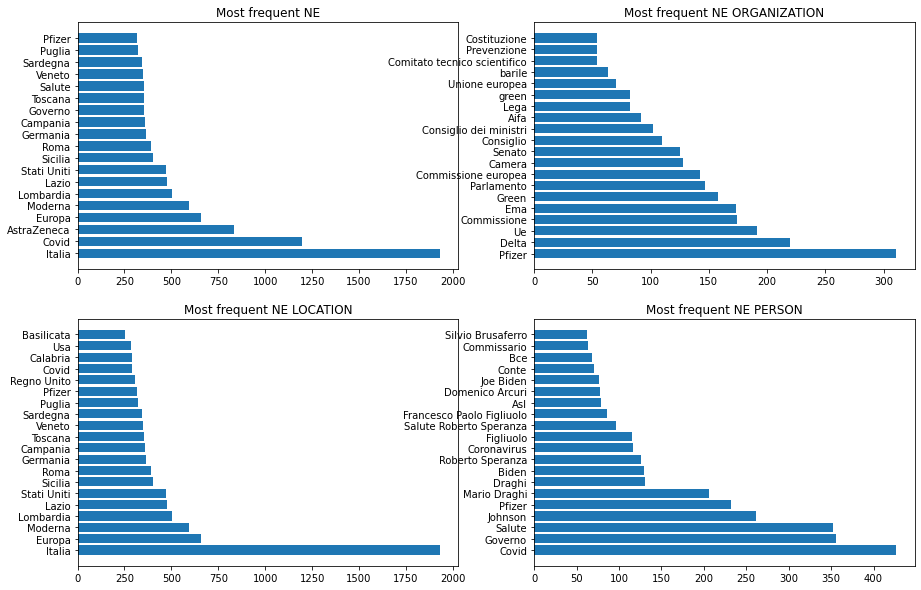

In [7]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')